# Sierpinski's carpet (software)

This notebook will look at creating Sierpinski's carpet, which is a fractal that works by dividing a square into 9 segments and removing the middle one. This process is then carried out recursively.

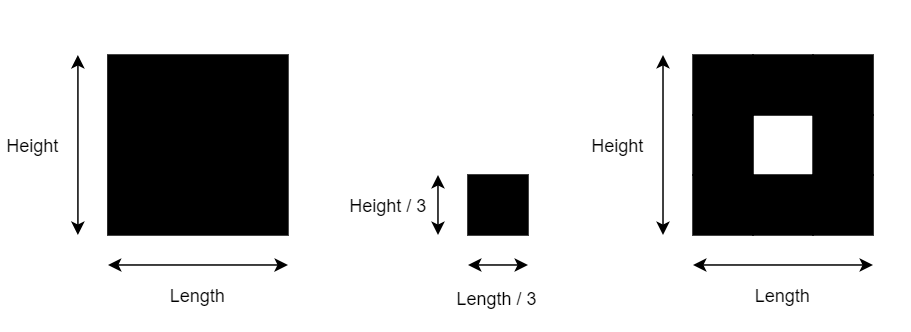

NOTE: This Notebook makes use of the resizer IP, as seen in the Pynq community example "Hello world resizer". See refrences in final cell

# Import libraries

In [1]:
from ipywidgets import *
from PIL import Image, ImageEnhance, ImageDraw, ImageColor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load image

In [2]:
image_path = "images/square.png"
original_image = Image.open(image_path)

# Create canvas to display image

Note the dimensions of the original image as the final fractal should share the same size

Image size: 360x360 pixels.


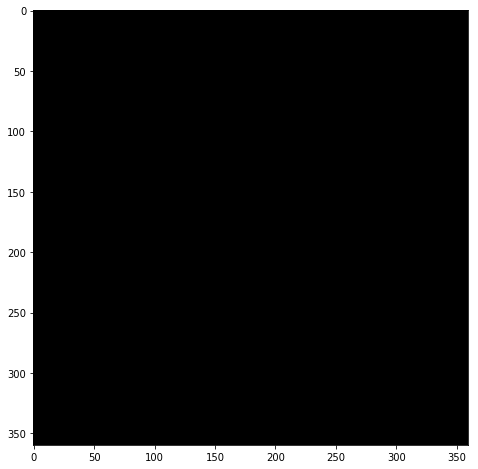

In [3]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))
_ = plt.imshow(original_image)

# Create slider

A slider is created so the user can select the number of iterations they want to execute for the fractal. To operate the slider run this cell then select desired number. 

In [4]:
def update(limit):
    
    limit = limit
    
    

limit=widgets.IntSlider(min=1,max=10,step=1)

interact(update, limit=limit);

interactive(children=(IntSlider(value=1, description='limit', max=10, min=1), Output()), _dom_classes=('widget…

We now cast the slider limit value to an integer, this way it can be used for the number of times the for loop executes

In [5]:
limitIntValue = int(limit.value)

# Create Sierpinski's carpet

A for loop executes the recursion, depending on how many iterations are selected from the slider.

The box variables are a tuple that sets the co-ordinates of the resized images. We then paste these boxes to the original image to create our fractal.

As this is the Sierpinski carpet we need to remove the middle square as mentioned previously. To do this we use a white fill on the middle box.

In [6]:
for n in range(limitIntValue):
           
            # Resize image
            
            new_width = int(old_width / 3)
            new_height = int(old_height / 3)
            
            new = original_image.resize((new_width, new_height))
            
            # Box co-ordinates used to position resized images

            box = (0, 0, new_width, new_height)
            box2 = (new_width, 0, 2 * new_width, new_height)
            box3 = (2 * new_width, 0, 3 * new_width, new_height)
            box4 = (0, new_height, new_width, 2 * new_height)
            box5 = (0, 2 * new_height, new_width, 3 * new_height)
            box6 = (new_width, new_height, 2 * new_width, 2 * new_height)
            box7 = (new_width, 2 * new_height, 2 * new_width, 3 * new_height)
            box8 = (2 * new_width, new_height, 3 * new_width, 2 * new_height)
            box9 = (2 * new_width, 2 * new_height, 3 * new_width, 3 * new_height)

            # Paste resized images onto original image

            original_image.paste(new, box)
            original_image.paste(new, box2)
            original_image.paste(new, box3)
            original_image.paste(new, box4)
            original_image.paste(new, box5)
            original_image.paste(new, box6)
            original_image.paste(new, box7)
            original_image.paste(new, box8)
            original_image.paste(new, box9)

            d = ImageDraw.Draw(original_image)
            
            # Fill middle square white

            d.rectangle([(new_width, new_height), (2 * new_width, 2 * new_height)], fill=(255, 255, 255, 255))
          
       

# Display Sierpinski's carpet

Note the dimensions of the fractal match the original image

Image size: 360x360 pixels.


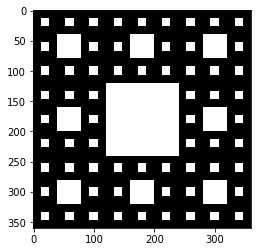

In [7]:
print("Image size: {}x{} pixels.".format(old_width, old_height))
_ = plt.imshow(original_image)

In [8]:
%%timeit

limitIntValue = int(limit.value)


for i in range(limitIntValue):
            new_width = int(old_width / 3)
            new_height = int(old_height / 3)

            box = (0, 0, new_width, new_height)
            box2 = (new_width, 0, 2 * new_width, new_height)
            box3 = (2 * new_width, 0, 3 * new_width, new_height)
            box4 = (0, new_height, new_width, 2 * new_height)
            box5 = (0, 2 * new_height, new_width, 3 * new_height)
            box6 = (new_width, new_height, 2 * new_width, 2 * new_height)
            box7 = (new_width, 2 * new_height, 2 * new_width, 3 * new_height)
            box8 = (2 * new_width, new_height, 3 * new_width, 2 * new_height)
            box9 = (2 * new_width, 2 * new_height, 3 * new_width, 3 * new_height)

            new = original_image.resize((new_width, new_height))

            original_image.paste(new, box)
            original_image.paste(new, box2)
            original_image.paste(new, box3)
            original_image.paste(new, box4)
            original_image.paste(new, box5)
            original_image.paste(new, box6)
            original_image.paste(new, box7)
            original_image.paste(new, box8)
            original_image.paste(new, box9)

            d = ImageDraw.Draw(original_image)

            d.rectangle([(new_width, new_height), (2 * new_width, 2 * new_height)], fill=(255, 255, 255, 255))
          
       


10 loops, best of 3: 28.6 ms per loop


# Refrences

https://github.com/Xilinx/PYNQ-HelloWorld

https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks_advanced_features.ipynb

https://pillow.readthedocs.io/en/3.1.x/index.html

https://github.com/Xilinx/PYNQ/blob/master/docs/source/python_environment.ipynb